# Psychoinformatics - Week 9 (Exercises)
by boyonglin (r10945002@ntu.edu.tw)

In [1]:
import numpy as np
from sklearn import *
from sklearn import model_selection
from matplotlib.pyplot import *
%matplotlib inline

## 1 檢查 machine learning pipeline (8 points)

### 1.1 請打亂原本的Y觀察正確率是否和chance level (0.33)有差異? 若有, why? (4 points)

In [34]:
# 本題在研究打亂X和打亂Y有差別嗎?
iris = datasets.load_iris()
X=iris.data
Y=iris.target
Y2=np.random.permutation(Y)
print(Y)
clf=neighbors.KNeighborsClassifier(1)
clf.fit(X,Y2)
accuracy=np.mean(clf.predict(X)==Y2)
print(accuracy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.9933333333333333


#### 1.1.1 修正 pipeline

In [59]:
clf = neighbors.KNeighborsClassifier(150)
clf.fit(X, Y2)

accuracy = np.mean(clf.predict(X) == Y2)
print(accuracy)


0.3333333333333333


#### 1.1.2 視覺化特徵

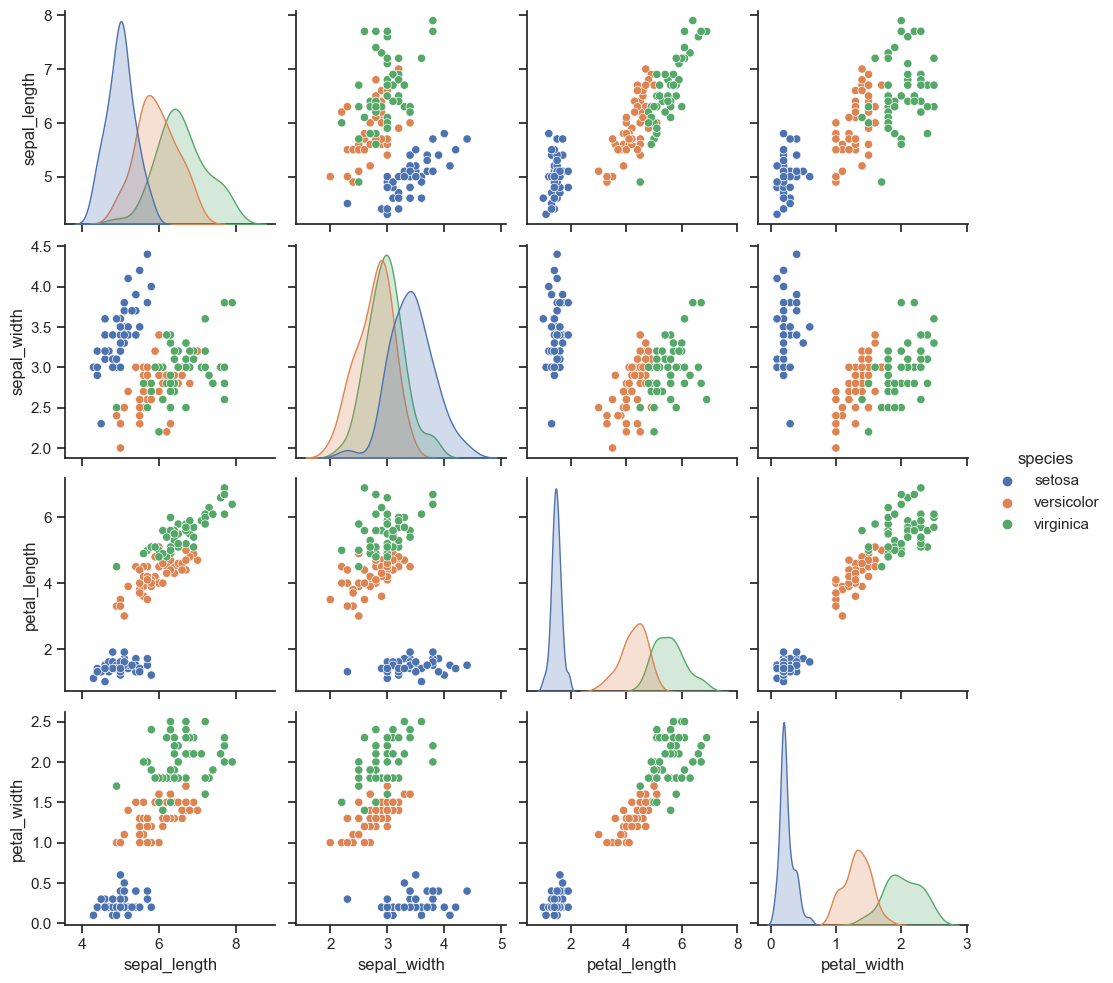

In [68]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')

#### 1.1.3 驗證假說

由於初始 n_neighbors 參數被設定為 1，即每次只考慮一個最近鄰，其中數據點之間可能有一些相似性（如資料集特徵分布），模型仍然可以預測一些數據點的標籤，這導致了 accuracy 相當接近於 1.0。  
因此我改將 n_neighbors 參數設定為 150，即考慮所有資料點，最後得到的 accuracy 為 0.33，與 chance level 相同。

### 1.2 請用母數或無母數統計檢定以下accuracies中的結果是否和chance level (0.5)有差異? 若有, why? (4 points)

In [159]:
Y=np.remainder(range(200),2)
print(Y) #Y的0和1個數一樣多

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [170]:
# 跑一百次測試:
clf=svm.SVC()
accuracies=[]
for i in range(100):
 X=np.random.rand(200,2) # X取亂數
 kf=model_selection.KFold(len(Y),shuffle=True) # Leave-one-out cross-validation
 sc=model_selection.cross_val_score(clf,X,Y,cv=kf)
 accuracies.append(sc.mean())

#### 1.2.1 母數統計檢定

In [171]:
# Please do your statistical tests here:
from scipy.stats import ttest_1samp
ttest_1samp(accuracies,0.5)

TtestResult(statistic=-1.6667597470884317, pvalue=0.09872298492582864, df=99)

#### 1.2.2 無母數統計檢定

In [172]:
from scipy.stats import wilcoxon

accuracies_np = np.array(accuracies)

wilcoxon(accuracies_np - 0.5)

WilcoxonResult(statistic=1896.0, pvalue=0.11431889247617877)

#### 1.2.3 隨機森林分類器

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"accuracy: {accuracy}")


accuracy: 0.5


#### 1.2.4 驗證假說

模型的預測能力與 chance level 沒有顯著差異（從 ttest 與 wilcoxon p-value 皆大於顯著性水平 0.05 可知）可能是由於數據集特徵不足以有效區分兩個類別，且數據集的 0 和 1 的數量相等（即平衡數據集），使得模型很難找到明顯的規律。  
雖嘗試過其他的分類器，如 Random Forest，但結果皆相同。

Please write your discussion here, if any.

### Please submit your notebook in PDF to NTU Cool by next Friday (11/10).